# Usage

Input the directory of the .csv in the cell below. It is assumed that the .csv is cleaned and has already had data that is Synthesized. Once that is done you can Run all.

What this ipynb does:
1. Read in the data
2. Sets all 0s in cholestrol as NaN
3. If Sex starts with "M" set's that to be 1. This means "Male" is 1, "Female" is 0.
4. Sets Result to 1 for values above 0. This is because one data sets uses the values from 1-4 to identify the extent of heart disease
5. Remove all rows with NaN in them
6. Runs the Support Vector Classifier, the Random Forest, and then the K nearest neighbors
7. Generates plots of the confusion matrix

In [61]:
import pandas as pd
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import glob

df = pd.read_csv('/content/Henry_synthesis_Data.csv') # ENTER FILE NAME HERE


In [10]:
# Variables we are using

xy_list = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar', 'Max Heart Rate']
x_list = ['Age', 'Sex', 'Systolic BP', 'Fasting Blood Sugar', 'Max Heart Rate', 'Cholesterol']
y_list = ['Result']

In [11]:
df = df[x_list + y_list]
# Little bit of data cleaning
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
# Accounting for datasets which give a range of heart disease.
df['Result'] = df['Result'].apply(lambda x: 1 if x != 0 else 0)
try:
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x.startswith == 'M' else 0)
except AttributeError:
    pass
df.dropna(inplace = True)
df

<ipython-input-11-9fa58588e1f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
<ipython-input-11-9fa58588e1f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'] = df['Result'].apply(lambda x: 1 if x != 0 else 0)
<ipython-input-11-9fa58588e1f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Age,Sex,Systolic BP,Fasting Blood Sugar,Max Heart Rate,Cholesterol,Result
0,39,1,106.0,0,180.7,195.000000,0
1,46,0,121.0,0,175.8,250.000000,0
2,48,1,127.5,0,174.4,245.000000,0
3,61,0,150.0,0,165.3,225.000000,1
4,46,0,130.0,0,175.8,285.000000,0
...,...,...,...,...,...,...,...
7775,44,1,122.0,1,177.2,244.741105,0
7776,66,1,125.0,1,161.8,276.979566,1
7777,45,1,168.0,1,176.5,298.916518,1
7778,54,1,117.0,0,170.2,229.154426,1


In [12]:
# run a SVM to predict the Result
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[xy_list]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7352185089974294

Text(0.5, 1.0, 'Cholesterol Distribution\nMean: 255.22, Std: 65.43')

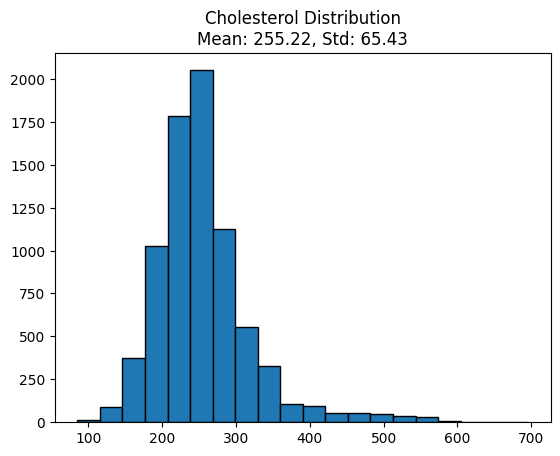

In [13]:
# plot distribution of y
plt.hist(X['Cholesterol'], bins=20, edgecolor='black')
plt.title("Cholesterol Distribution\nMean: {:.2f}, Std: {:.2f}".format(X['Cholesterol'].mean(), X['Cholesterol'].std()))

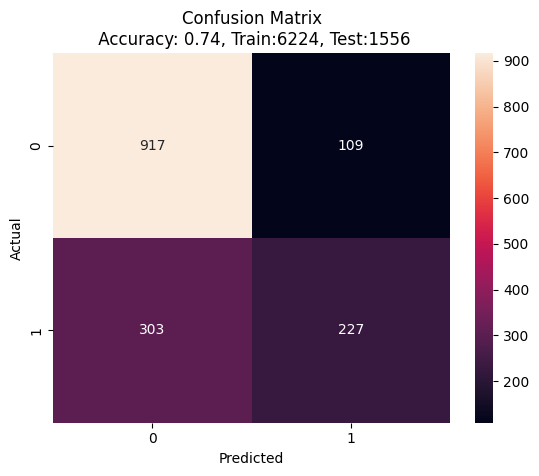

In [14]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))
plt.ylabel('Actual')
plt.show()

# check if it is a significant model
from sklearn.model_selection import cross_val_score



In [15]:
a = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(a.mean())

0.4532867817051877


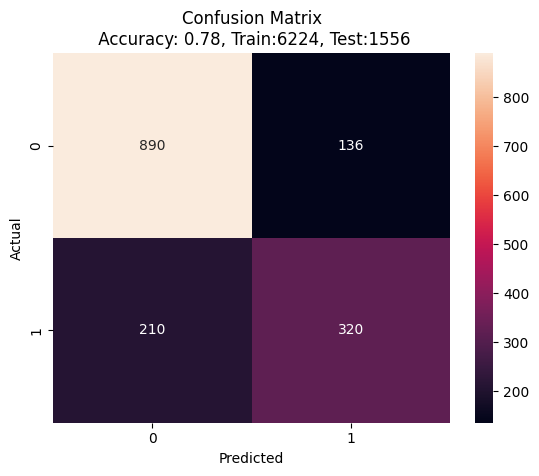

In [16]:
# do the same with a RF model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))

plt.ylabel('Actual')

plt.show()


In [17]:
# check if it is a significant model
a = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(a.mean())

0.5345513857979627


Text(50.722222222222214, 0.5, 'Actual')

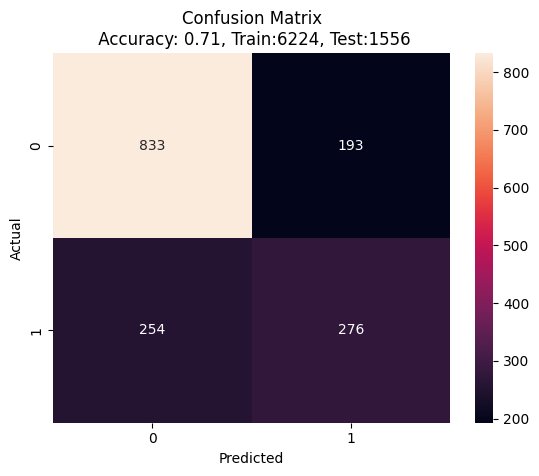

In [18]:
# try with a K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}, Train:{1:.0f}, Test:{2:.0f}'.format(accuracy_score(y_test, y_pred), len(X_train), len(X_test) ))

plt.ylabel('Actual')



In [20]:
# get the cross validation score
a = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
print(a.mean())

0.45018283561642675


In [7]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [19]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [42]:
X_map = df[xy_list]
scaler = StandardScaler()
X_umap_scaled = scaler.fit_transform(X_map)

umap = UMAP(n_components=2, random_state=42)
X_umap_2d = umap.fit_transform(X_umap_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
palette_01 = {0: "#1f77b4",  1: "#ff7f0e"}

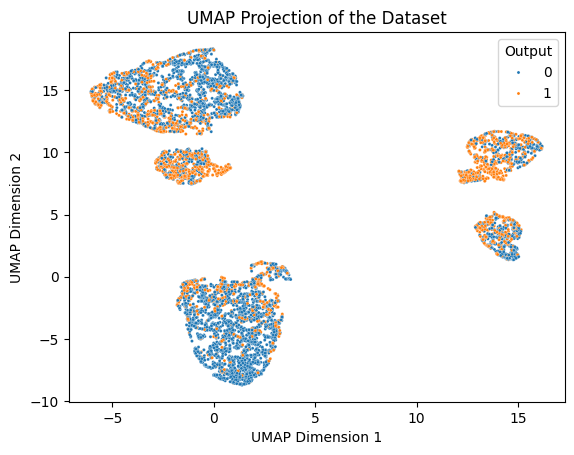

In [37]:
plt.figure()
sns.scatterplot(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], hue=y, palette=palette_01, s=5, alpha=1)
plt.title("UMAP Projection of the Original Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title='Output', loc='best')
plt.show()

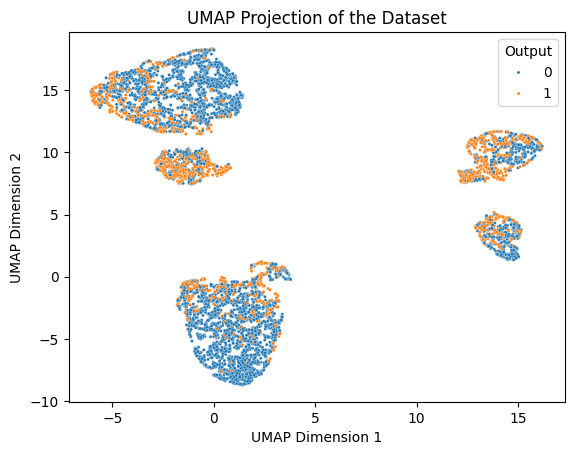

In [38]:
y_predict = clf.predict(X_map)
plt.figure()
sns.scatterplot(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], hue=y_predict, palette=palette_01, s=5, alpha=1)
plt.title("UMAP Projection of the Predict Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title='Output', loc='best')
plt.show()

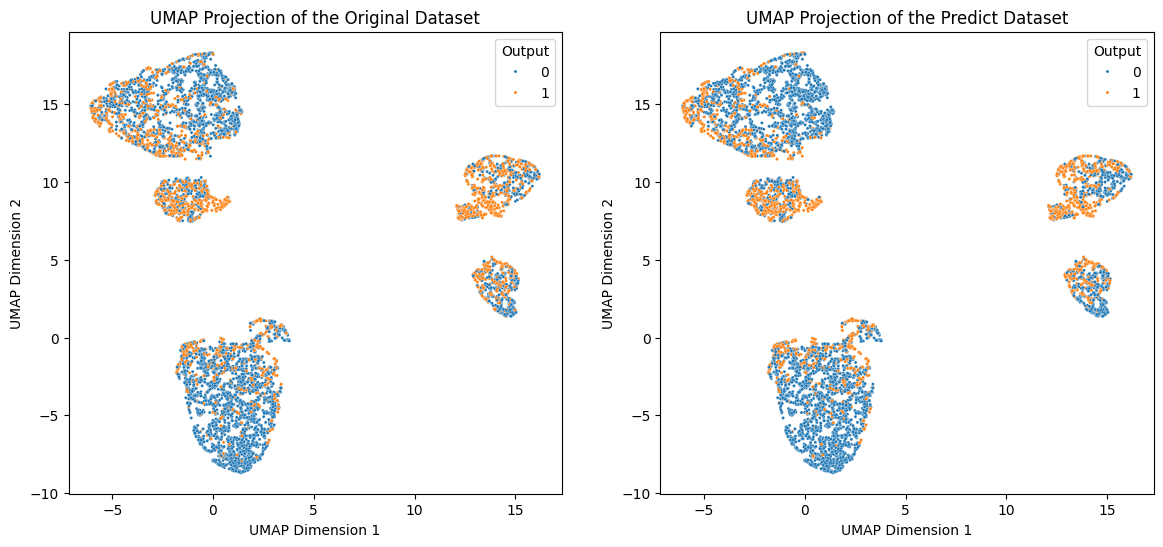

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], hue=y, palette=palette_01, s=5, alpha=1, ax=axes[0])
axes[0].set_title("UMAP Projection of the Original Dataset")
axes[0].set_xlabel("UMAP Dimension 1")
axes[0].set_ylabel("UMAP Dimension 2")
axes[0].legend(title='Output', loc='best')

sns.scatterplot(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], hue=y_predict, palette=palette_01, s=5, alpha=1, ax=axes[1])
axes[1].set_title("UMAP Projection of the Predict Dataset")
axes[1].set_title("UMAP Projection of the Predict Dataset")
axes[1].set_xlabel("UMAP Dimension 1")
axes[1].set_ylabel("UMAP Dimension 2")
axes[1].legend(title='Output', loc='best')
axes[1].legend(title='Output', loc='best')
plt.show()

In [41]:
xy_list_heart = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar']
X_map_heart = df[xy_list_heart]
scaler = StandardScaler()
X_umap_scaled_h = scaler.fit_transform(X_map_heart)

umap = UMAP(n_components=1, random_state=42)
X_umap_1d = umap.fit_transform(X_umap_scaled_h)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [52]:
len(X_umap_1d)
X_umap_1d = X_umap_1d.reshape(-1)
X_umap_1d

array([-22.024261,  11.006849, -10.845882, ...,  24.898796, -15.495031,
        24.624884], dtype=float32)

In [53]:
heart_rate = df['Max Heart Rate'].to_numpy()
heart_rate

array([180.7, 175.8, 174.4, ..., 176.5, 170.2, 172.3])

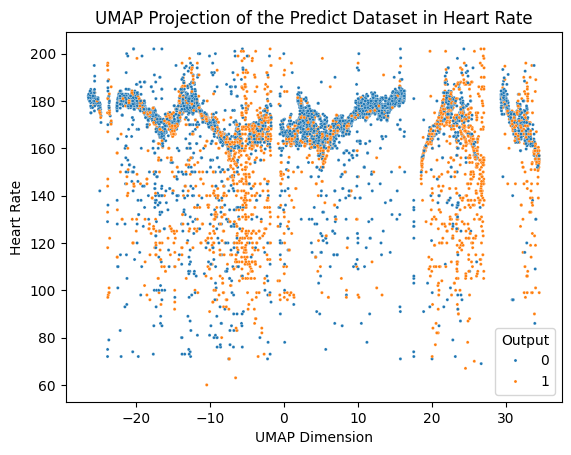

In [56]:
sns.scatterplot(x=X_umap_1d, y=df['Max Heart Rate'].to_numpy(), hue=y, palette=palette_01, s=5, alpha=1)
plt.title("UMAP Projection of the Predict Dataset in Heart Rate")
plt.ylabel("Heart Rate")
plt.xlabel("UMAP Dimension")
plt.legend(title='Output', loc='best')
plt.show()

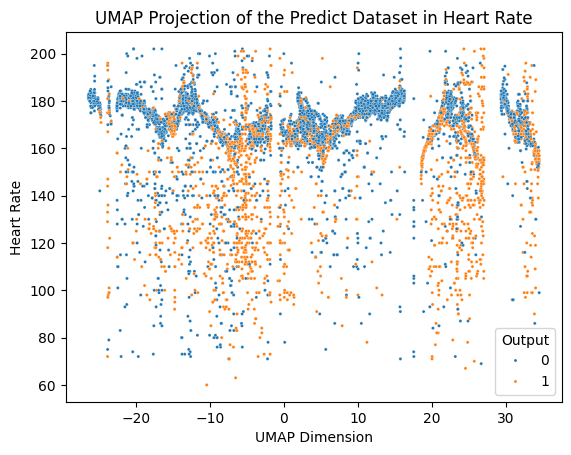

In [64]:
sns.scatterplot(x=X_umap_1d, y=df['Max Heart Rate'].to_numpy(), hue=y_predict, palette=palette_01, s=5, alpha=1)
plt.title("UMAP Projection of the Predict Dataset in Heart Rate")
plt.ylabel("Heart Rate")
plt.xlabel("UMAP Dimension")
plt.legend(title='Output', loc='best')
plt.show()

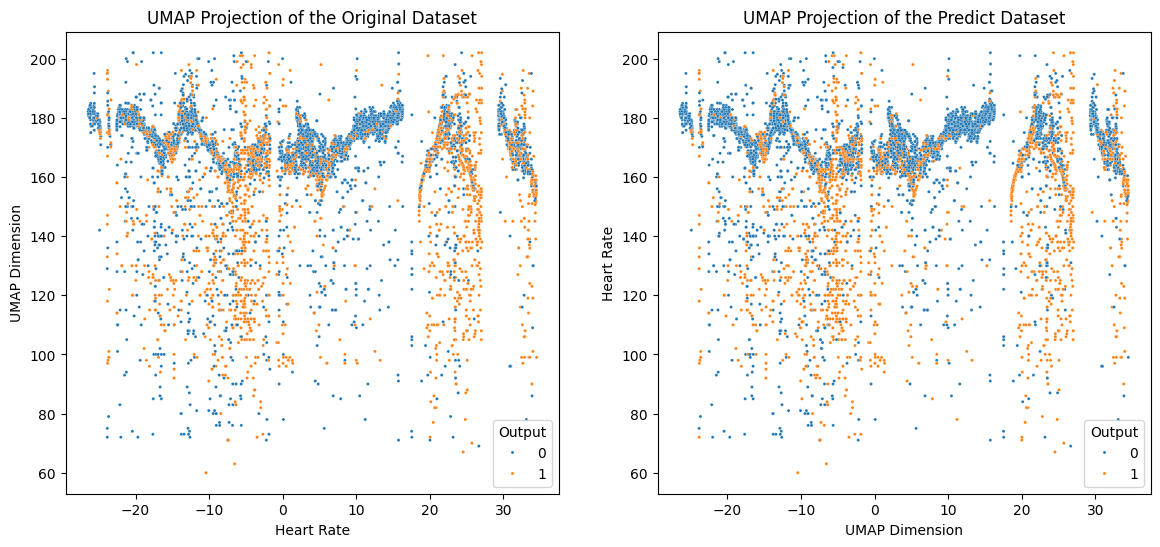

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_umap_1d, y=df['Max Heart Rate'].to_numpy(), hue=y, palette=palette_01, s=5, alpha=1, ax=axes[0])
axes[0].set_title("UMAP Projection of the Original Dataset")
axes[0].set_xlabel("Heart Rate")
axes[0].set_ylabel("UMAP Dimension")
axes[0].legend(title='Output', loc='best')

sns.scatterplot(x=X_umap_1d, y=df['Max Heart Rate'].to_numpy(), hue=y_predict, palette=palette_01, s=5, alpha=1, ax=axes[1])
axes[1].set_title("UMAP Projection of the Predict Dataset")
axes[1].set_title("UMAP Projection of the Predict Dataset")
axes[1].set_ylabel("Heart Rate")
axes[1].set_xlabel("UMAP Dimension")
axes[1].legend(title='Output', loc='best')
axes[1].legend(title='Output', loc='best')
plt.show()